In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

img1 = plt.imread('box_left_2k.jpg')
img2 = plt.imread('box_right_2k.jpg')

pts1 = np.array([[1148, 351], [1441, 481], [1427, 662], [1172, 525], [1524,80], [1795,134], [1744,307],
        [1564, 320], [1579, 306], [1584, 288]])

pts2 = np.array([[747, 397], [944,522], [1010,704], [822,558], [1212,116], [1440,170], [1433,350],
        [1131,360], [1152,342], [1166,326]])

K1 = np.array([[1062.04, 0, 1098.52], [0, 1061.74, 599.665], [0, 0, 1]])
K2 = np.array([[1060.59, 0, 1127.03], [0, 1060.06, 645.711], [0, 0, 1]])

# TODO 1 (15 points): Normalize image points.
#        There is no need to use for loops in this task. If you use for loops in this task, you can get at most 10 point.
# TODO 2 (25 points): Compute the fundamental matrix F.
# TODO 3 (15 points): Draw epipolar lines in image1.
# TODO 4 (10 points): Draw the epipole and epipolar lines in image1.
# TODO 5 (5 points): Compute the 4 possible camera matrices.
# TODO 6 (25 points): Triangulation.
#        There is no need to use for loops when computing the reconstruction errors of pts1 (or pts2).
#        If you do, you can get at most 20 point.
# TODO 7 (5 points): Visualize the 3D reconstruction.

In [2]:
# TODO 1 (15 points): Normalize image points.
#        There is no need to use for loops in this task. If you use for loops in this task, you can get at most 10 point.

# Normalize Points with new origin and mean distance
# newOrigin: new coordinate system's origin with [x_origin, y_origin]
# desiredDistance: The mean distance of points from new origin
def normalize2dPt(Pts, newOrigin, desiredDistance):
    newPts = Pts - newOrigin
    distances = np.mean(np.linalg.norm(newPts, axis=1))
    scale = desiredDistance / distances
    normalizePts = newPts * scale
    return normalizePts, scale

def createM_Translation(s, tx, ty):
    M_Translation = np.array([[s, 0, -s*tx],
                              [0, s, -s*ty],
                              [0, 0, 1]])
    return M_Translation

pts1_mean = np.mean(pts1, axis=0)
pts2_mean = np.mean(pts2, axis=0)

pts1_normal, s1 = normalize2dPt(pts1, pts1_mean, np.sqrt(2))
pts2_normal, s2 = normalize2dPt(pts2, pts2_mean, np.sqrt(2))

print("pts1_normal = \n", pts1_normal)
print("pts2_normal = \n", pts2_normal)

M_T1 = createM_Translation(s1, pts1_mean[0], pts1_mean[1])
M_T2 = createM_Translation(s2, pts2_mean[0], pts2_mean[1])

# print("T1 = \n", M_T1)
# print("T2 = \n", M_T2)

print("The mean distance of the image points in pts1_normal from the origin is {}".format(np.mean(np.linalg.norm(pts1_normal, axis=1))))


pts1_normal = 
 [[-2.11532526  0.03386456]
 [-0.34348335  0.82000602]
 [-0.42814474  1.91455683]
 [-1.97019146  1.08608467]
 [ 0.15843774 -1.60493804]
 [ 1.79724033 -1.27838697]
 [ 1.48883099 -0.23221409]
 [ 0.40032742 -0.15359995]
 [ 0.49103605 -0.23826134]
 [ 0.52127226 -0.34711169]]
pts2_normal = 
 [[-2.08377795  0.07261562]
 [-0.93935571  0.79877187]
 [-0.55594522  1.85605535]
 [-1.64808421  1.00790486]
 [ 0.61752327 -1.55978361]
 [ 1.94203225 -1.24608411]
 [ 1.9013675  -0.20041912]
 [ 0.14697402 -0.14232662]
 [ 0.26896827 -0.24689312]
 [ 0.35029777 -0.33984112]]
The mean distance of the image points in pts1_normal from the origin is 1.4142135623730951


In [3]:
# TODO 2 (25 points): Compute the fundamental matrix F.

# Step 1. Construct array A of shape (n,9) 
A = np.empty(shape=(len(pts1_normal), 9))
for i in range(len(pts1_normal)):
    xi, yi = pts1_normal[i]
    xi_prime, yi_prime = pts2_normal[i]
    A[i, :] = [xi * xi_prime, xi_prime * yi, xi_prime, xi * yi_prime, yi * yi_prime, yi_prime, xi, yi, 1]
print("Matrix A's shape is {}".format(A.shape))

# Step 2. Implement the 8-point algorithm to compute the fundamental matrix 𝐅𝑛, and 𝐅𝑛 should have rank two
u, sigma, vh = np.linalg.svd(A)
f = vh[-1, :]
f = f.reshape(3,3)
u_prime, sigma_prime, vh_prime = np.linalg.svd(f)
print("u_prime's shape = {}".format(u_prime.shape))
print("sigma_prime's shape = {}".format(sigma_prime.shape))
print("vh_prime's shape = {}".format(vh_prime.shape))

Fn = u_prime @ np.diag([sigma_prime[0], sigma_prime[1], 0]) @ vh_prime
print("The Rank of Matrix f: ", np.linalg.matrix_rank(f))
print("The Rank of Matrix Fn: ", np.linalg.matrix_rank(Fn))

# Step 3. 
F = M_T2.T @ Fn @ M_T1

# Step 4. Display the epipolar error
expandPts1 = np.hstack((pts1, np.ones((pts1.shape[0], 1))))
expandPts2 = np.hstack((pts2, np.ones((pts2.shape[0], 1))))
E_epipolar = np.sum(expandPts2 @ F @ expandPts1.T)
print("The epipolar error is {}".format(E_epipolar))


Matrix A's shape is (10, 9)
u_prime's shape = (3, 3)
sigma_prime's shape = (3,)
vh_prime's shape = (3, 3)
The Rank of Matrix f:  3
The Rank of Matrix Fn:  2
The epipolar error is 0.9554638059775122


(-0.5, 2207.5, 1241.5, -0.5)

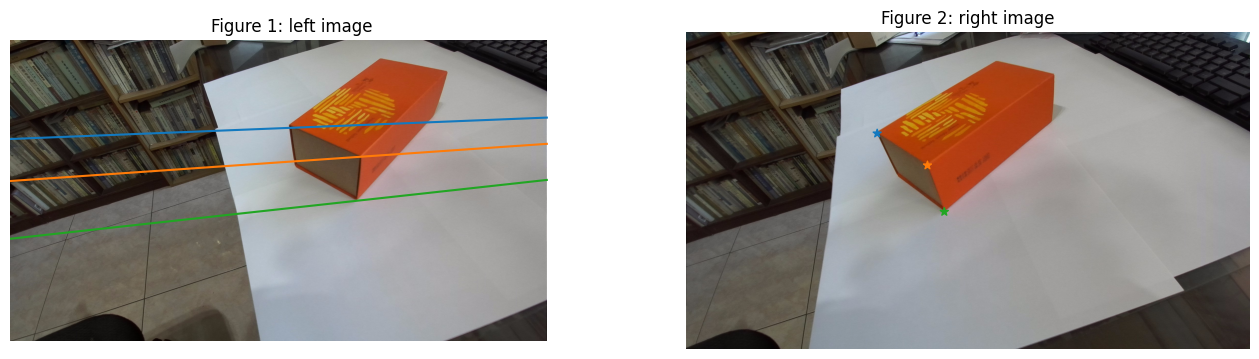

In [4]:
# TODO 3 (15 points): Draw epipolar lines in image1.
p1_prime, p2_prime, p3_prime = pts2[0:3, :]

# Line parameter: FT @ p1_prime = [a, b, c]T
epipolarLineParam1 = F.T @ np.vstack(np.append(p1_prime, 1))
epipolarLineParam2 = F.T @ np.vstack(np.append(p2_prime, 1))
epipolarLineParam3 = F.T @ np.vstack(np.append(p3_prime, 1))

x_fig1 = np.linspace(0, img1.shape[1], 1000)
y1_fig1 = - (epipolarLineParam1[0] * x_fig1 + epipolarLineParam1[2]) / epipolarLineParam1[1]
y2_fig1 = - (epipolarLineParam2[0] * x_fig1 + epipolarLineParam2[2]) / epipolarLineParam2[1]
y3_fig1 = - (epipolarLineParam3[0] * x_fig1 + epipolarLineParam3[2]) / epipolarLineParam3[1]

# ------------------------------------
# --------------- Plot --------------- 
# ------------------------------------
colorSet = ["#1379BF", "#FF7B08", "#21A623"]

fig = plt.figure(label="Draw epipolar line", figsize=(16, 12))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Figure 1: left image")
plt.plot(x_fig1, y1_fig1, color=colorSet[0])
plt.plot(x_fig1, y2_fig1, color=colorSet[1])
plt.plot(x_fig1, y3_fig1, color=colorSet[2])
plt.axis("off")

ax2 = fig.add_subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Figure 2: right image")
plt.scatter([p1_prime[0], p2_prime[0], p3_prime[0]], [p1_prime[1], p2_prime[1], p3_prime[1]], c=colorSet, marker="*")
plt.axis("off") 


intersection =  [5886.3782082   173.82742614]


(-0.5, 6180.722118610859, 1241.5, -0.5)

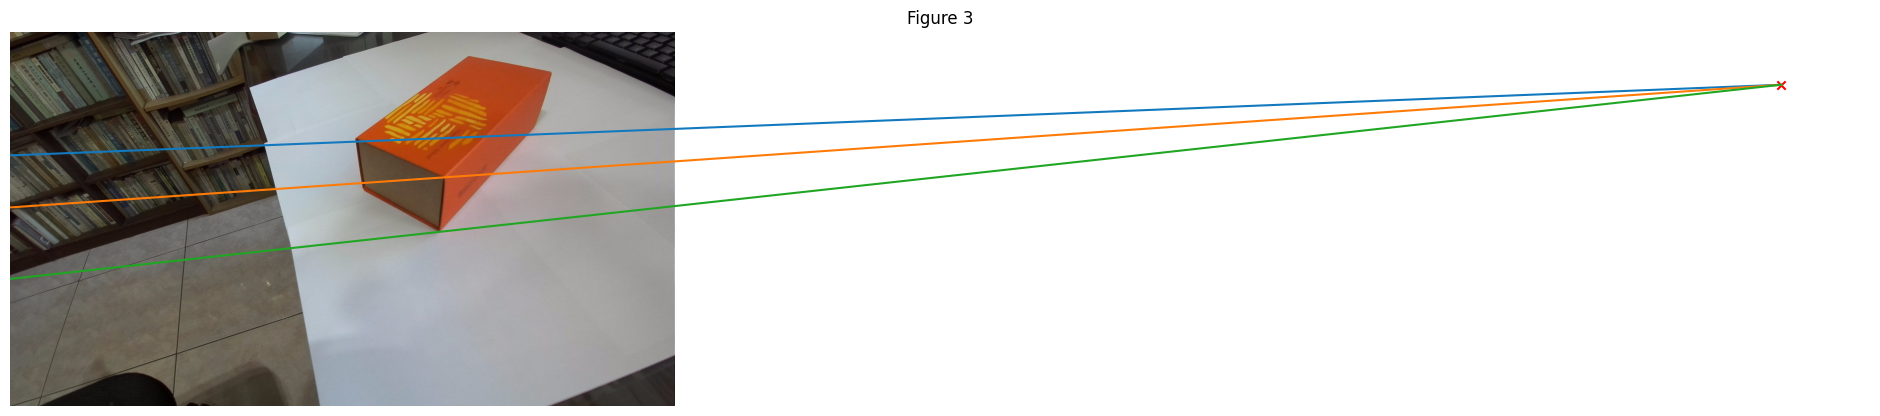

In [5]:
# TODO 4 (10 points): Draw the epipole and epipolar lines in image1.
# ax + by + c = 0 
# -> ax + by = -c
# Use Two of epipolar line to find intersection
M_A = np.array([[epipolarLineParam2[0][0],epipolarLineParam2[1][0]], [epipolarLineParam3[0][0], epipolarLineParam3[1][0]]])
M_B = np.array([-[epipolarLineParam2[2, 0]][0], -[epipolarLineParam3[2, 0]][0]])

intersection = np.linalg.solve(M_A, M_B)
print("intersection = ", intersection)

x_fig1 = np.linspace(0, intersection[0], 1000)
y1_fig1 = - (epipolarLineParam1[0] * x_fig1 + epipolarLineParam1[2]) / epipolarLineParam1[1]
y2_fig1 = - (epipolarLineParam2[0] * x_fig1 + epipolarLineParam2[2]) / epipolarLineParam2[1]
y3_fig1 = - (epipolarLineParam3[0] * x_fig1 + epipolarLineParam3[2]) / epipolarLineParam3[1]

# ------------------------------------
# --------------- Plot --------------- 
# ------------------------------------
plt.close()    # Close last created figure 
colorSet = ["#1379BF", "#FF7B08", "#21A623"]

fig = plt.figure(label="Draw epipolar line's intersection", figsize=(24, 18))
ax = fig.add_subplot(1, 1, 1)

ax.imshow(img1)
ax.plot(x_fig1, y1_fig1, color=colorSet[0])
ax.plot(x_fig1, y2_fig1, color=colorSet[1])
ax.plot(x_fig1, y3_fig1, color=colorSet[2])
ax.scatter(intersection[0], intersection[1], marker="x", color="r")

ax.set_title("Figure 3")

ax.axis("off")

In [7]:
# TODO 5 (5 points): Compute the 4 possible camera matrices.
# Calculate Essential matrix
E = K2.T @ F @ K1

u_essential, sigma_essential, vh_essentail = np.linalg.svd(E)
print(u_essential,sigma_essential,vh_essentail)

u3 = u_essential[-1, :].reshape((3, 1))

W = np.array([[0, -1, 0],
             [1, 0, 0],
             [0, 0, 1]])

if(np.linalg.det(u_essential @ W @ vh_essentail) < 0):
    W = -W

R1 = u_essential @ W  @ vh_essentail
R2 = u_essential @ W.T  @ vh_essentail
t1 = u3
t2 = -u3

Rt2_list = [np.hstack((R1, t1)), np.hstack((R1, t2)), np.hstack((R2, t1)), np.hstack((R2, t2))]
print(Rt2_list, np.array(Rt2_list).shape)

[[-0.02636932 -0.01694556 -0.99950863]
 [-0.85877492 -0.51139444  0.03132657]
 [-0.51167401  0.85917901 -0.0010673 ]] [5.04983719e+00 4.38043299e+00 1.16774403e-16] [[ 0.22909993  0.51382295 -0.8267401 ]
 [ 0.03931666 -0.85352132 -0.51957247]
 [-0.97260856  0.08652936 -0.21574348]]
[array([[ 0.96928518, -0.11770064,  0.21594628, -0.51167401],
       [-0.11386476, -0.99303824, -0.03016402,  0.85917901],
       [ 0.21799323,  0.00464886, -0.97593921, -0.0010673 ]]), array([[ 0.96928518, -0.11770064,  0.21594628,  0.51167401],
       [-0.11386476, -0.99303824, -0.03016402, -0.85917901],
       [ 0.21799323,  0.00464886, -0.97593921,  0.0010673 ]]), array([[ 0.97497613, -0.05527304,  0.21532867, -0.51167401],
       [ 0.05292778,  0.99845958,  0.01664701,  0.85917901],
       [-0.2159171 , -0.00483357,  0.97639973, -0.0010673 ]]), array([[ 0.97497613, -0.05527304,  0.21532867,  0.51167401],
       [ 0.05292778,  0.99845958,  0.01664701, -0.85917901],
       [-0.2159171 , -0.00483357,  0.97

In [14]:
# TODO 6 (25 points): Triangulation.
#        There is no need to use for loops when computing the reconstruction errors of pts1 (or pts2).
#        If you do, you can get at most 20 point.

# Step 1. 
X_list = []

# Step 2. 
P1 = K1 @ np.hstack((np.identity(3), np.zeros((3, 1))))
print(P1.shape)

for j, Rt2 in enumerate(Rt2_list):
    P2 = K2 @ Rt2
    A = np.array([
        [P1[0, 0] - P1[2, 0]*pts1[:, 0], P1[0, 1] - P1[2, 1]*pts1[:, 0], P1[0, 2] - P1[2, 2]*pts1[:, 0]],
        [P1[1, 0] - P1[2, 0]*pts1[:, 1], P1[1, 1] - P1[2, 1]*pts1[:, 1], P1[1, 2] - P1[2, 2]*pts1[:, 1]],
        [P2[0, 0] - P2[2, 0]*pts2[:, 0], P2[0, 1] - P2[2, 1]*pts2[:, 0], P2[0, 2] - P2[2, 2]*pts2[:, 0]],
        [P2[1, 0] - P2[2, 0]*pts2[:, 1], P2[1, 1] - P2[2, 1]*pts2[:, 1], P2[1, 2] - P2[2, 2]*pts2[:, 1]]        
        ])

    b = np.array([
        [P1[2, 3]*pts1[:, 0] - P1[0, 3]],
        [P1[2, 3]*pts1[:, 1] - P1[1, 3]],
        [P2[2, 3]*pts2[:, 0] - P2[0, 3]],
        [P2[2, 3]*pts2[:, 1] - P2[1, 3]]
        ])

    X = np.empty((3, pts1.shape[0]))

    for i in range(A.shape[2]):
        Xi, residuals, rank, s = np.linalg.lstsq(A[:, :, i],b[:, :, i], rcond=-1)
        X[:, i:i+1] = Xi
    X_list.append(X)

X_list = np.array(X_list)

# Step 3. 
indexJ = None
for i, X_list_content in enumerate(X_list):
    if np.all(X_list_content[2, :] > 0):
        print("Legal index = {}".format(i))
        indexJ = i
X_best = X_list[indexJ]
print('index: ',X_best.T)


# Step 4. Display the reconstruction error for pts1 and pts2, respectively
Mi_tilde = np.vstack((X_best, np.ones((1, X_best.shape[1]))))
mi_tilde = P1 @ Mi_tilde
mi_tilde_prime = K2 @ Rt2_list[j] @ Mi_tilde

mi_tilde = mi_tilde[0:2, :] / mi_tilde[2, :]
mi_tilde_prime = mi_tilde_prime[0:2, :] / mi_tilde_prime[2, :]

# Calculate reconstruction error 
reconstructionE_pts1 = np.mean(np.linalg.norm(pts1 - mi_tilde.T, axis=1))
reconstructionE_pts2 = np.mean(np.linalg.norm(pts2 - mi_tilde_prime.T, axis=1))

print("The reconstruction error for pts1 is {}".format(reconstructionE_pts1))
print("The reconstruction error for pts2 is {}".format(reconstructionE_pts2))

(3, 4)
Legal index = 2
index:  [[ 0.04221425 -0.61215737  0.76198577]
 [ 0.22113155 -0.51389142  0.67187172]
 [ 0.23002532 -0.40155376  0.74414658]
 [ 0.06205152 -0.49891045  0.8138165 ]
 [ 0.35681325 -0.83770475  0.84136861]
 [ 0.5137668  -0.7602397   0.76659606]
 [ 0.50374347 -0.65645726  0.8111897 ]
 [ 0.3243607  -0.62205783  0.71286126]
 [ 0.3358891  -0.63120043  0.70984634]
 [ 0.34373514 -0.6454003   0.72172023]]
The reconstruction error for pts1 is 613.7627598123975
The reconstruction error for pts2 is 2570.3260324905104


Text(0.5, 0.92, 'Figure 6')

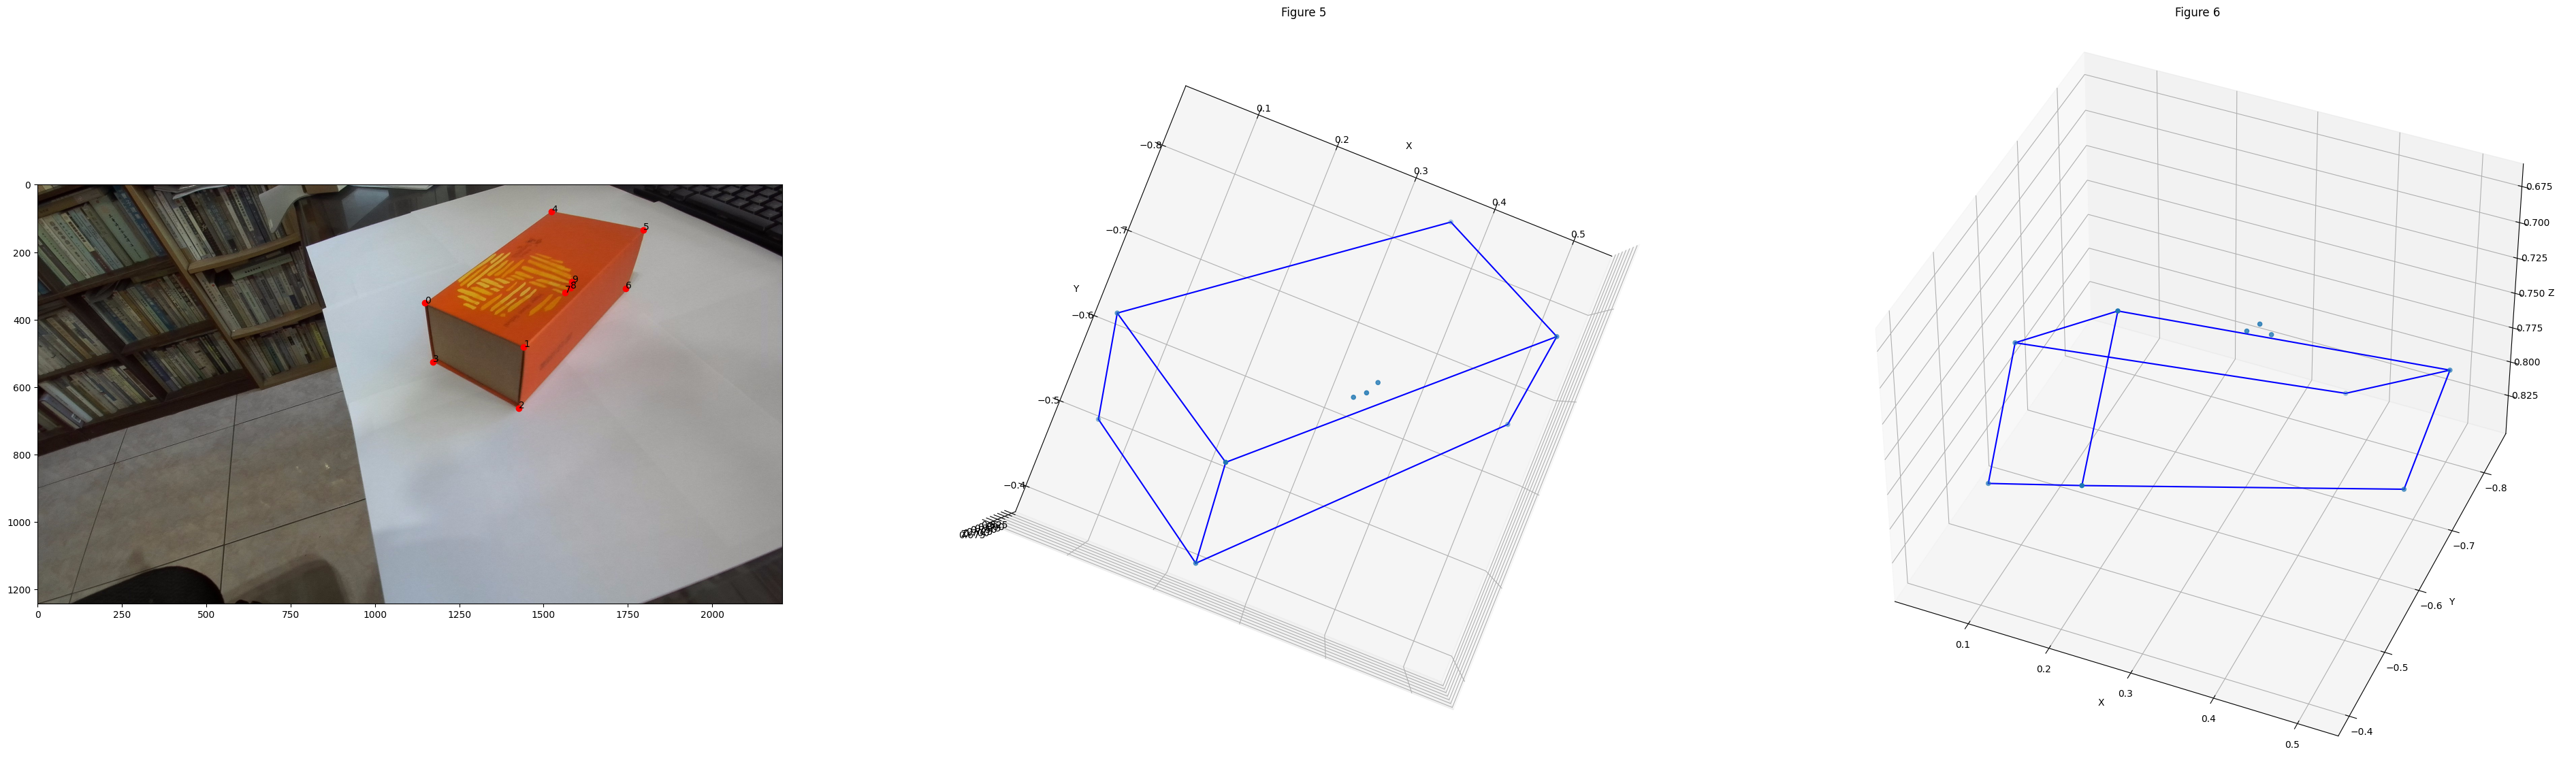

In [9]:
# TODO 7 (5 points): Visualize the 3D reconstruction.
# Defined nine edges 
edges = [(0, 1), (1, 2), (2, 3), (3, 0), 
        (4, 5), (5, 6), (0, 4), (1, 5), (2, 6)]

X_best = X_best.T

# ------------------------------------
# --------------- Plot --------------- 
# ------------------------------------
plt.close() # Close last created figure 

fig = plt.figure(label="Draw epipolar line's intersection", figsize=(48, 36))

# --------------- Figure 4 --------------- 
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img1)
ax.scatter(pts1[:, 0], pts1[:, 1], color="red")
# ax.scatter(mi_tilde.T[:, 0], mi_tilde.T[:, 1], color="blue")

for i in range(pts1.shape[0]):
    ax.text(pts1[i, 0], pts1[i, 1], s=i, color="black")

# --------------- Figure 5 ---------------
# --------- Edges with Vertices ---------- 
ax3 = fig.add_subplot(1, 3, 2, projection='3d')

# Plot the edges in 3d
for edge in edges:
    x = [X_best[edge[0]][0], X_best[edge[1]][0]]
    y = [X_best[edge[0]][1], X_best[edge[1]][1]]
    z = [X_best[edge[0]][2], X_best[edge[1]][2]]
    ax3.plot(x, y, z, color='blue')

# Plot the 3D points (X_best)
ax3.scatter(X_best[:, 0], X_best[:, 1], X_best[:, 2])

ax3.view_init(elev=-90, azim=-115)

# Set labels for x, y, and z axes
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title("Figure 5")

# --------------- Figure 6 --------------- 
# --------- Edges with Vertices ---------- 
ax5 = fig.add_subplot(1, 3, 3, projection='3d')
ax5.view_init(elev=-139, azim=-113)

# Plot the edges in 3d
for edge in edges:
    x = [X_best[edge[0]][0], X_best[edge[1]][0]]
    y = [X_best[edge[0]][1], X_best[edge[1]][1]]
    z = [X_best[edge[0]][2], X_best[edge[1]][2]]
    ax5.plot(x, y, z, color='blue')

# Plot the 3D points (X_best)
ax5.scatter(X_best[:, 0], X_best[:, 1], X_best[:, 2])

# Set labels for x, y, and z axes
ax5.set_xlabel('X')
ax5.set_ylabel('Y')
ax5.set_zlabel('Z')
ax5.set_title("Figure 6")